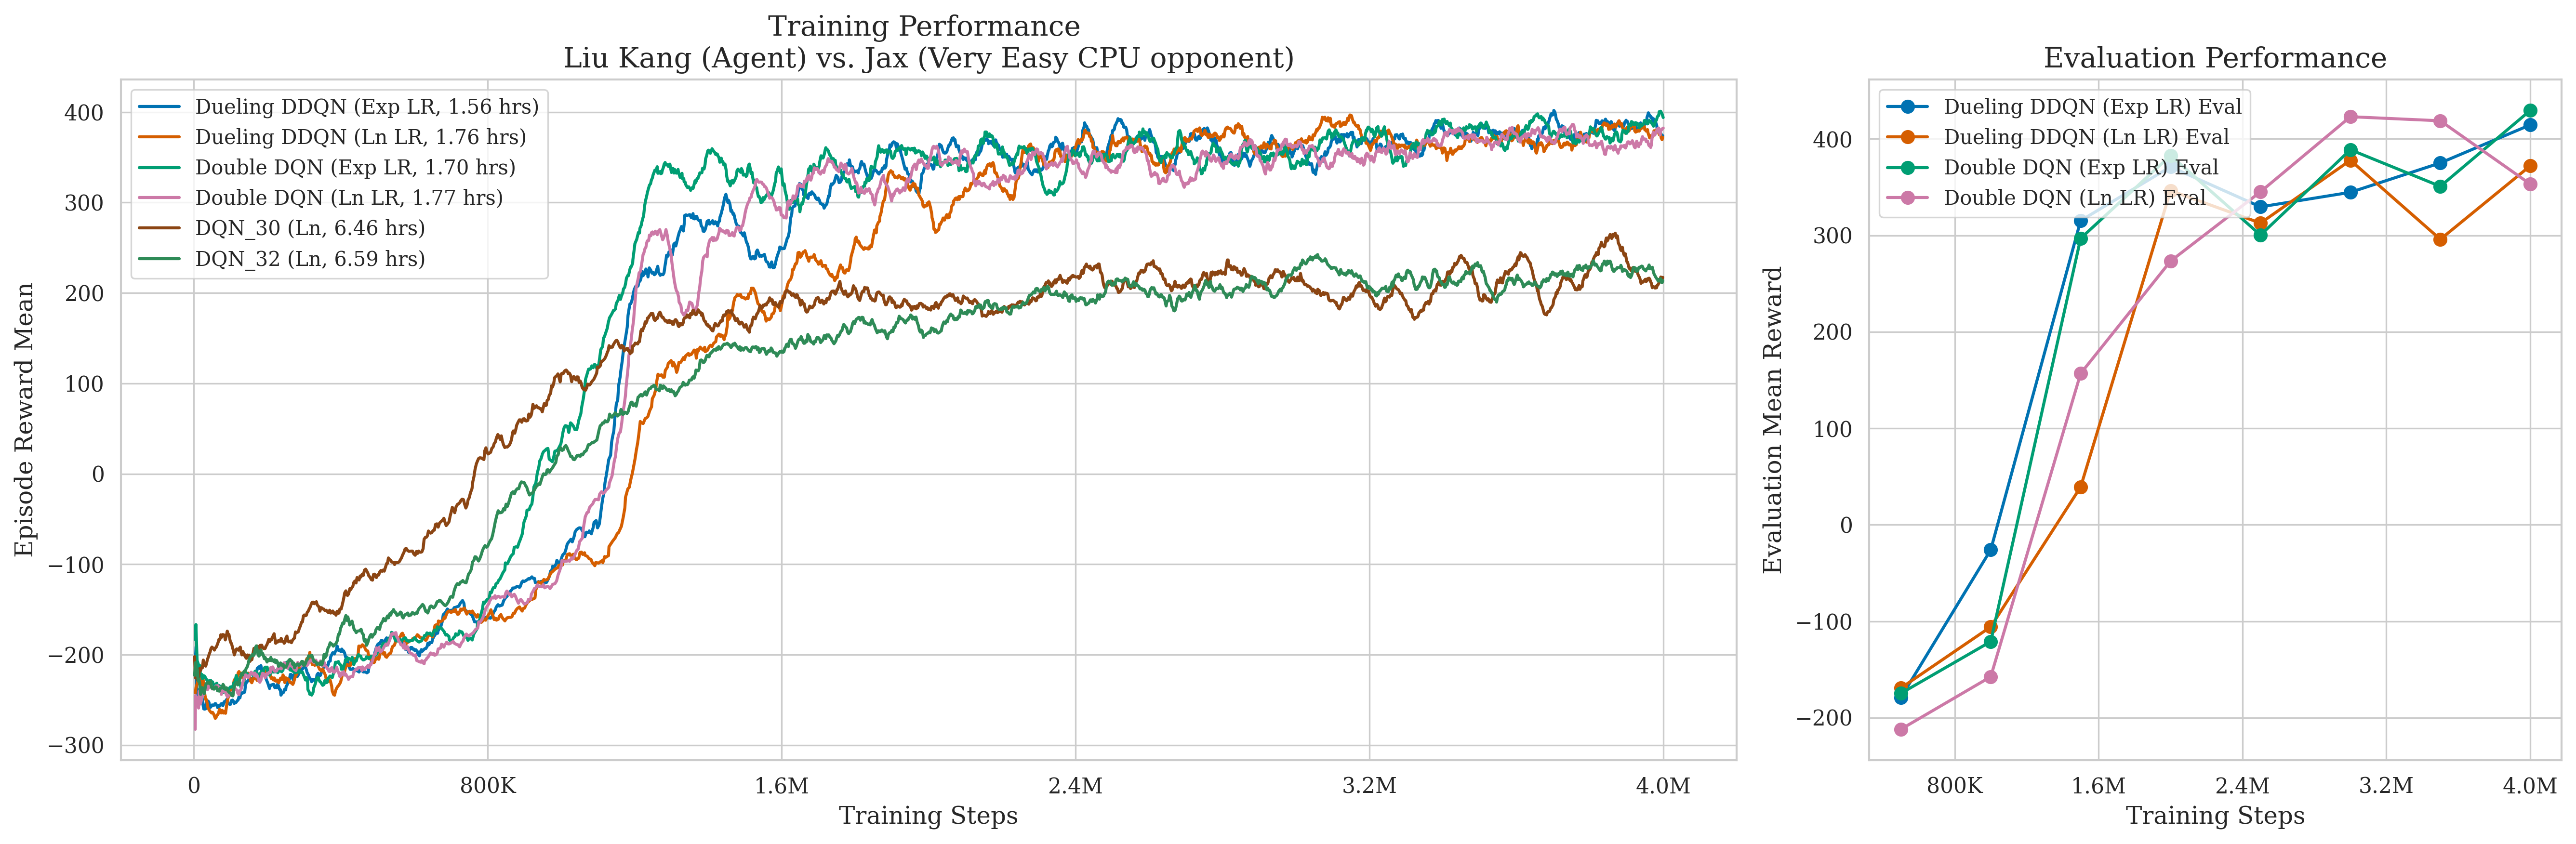

In [ ]:
# Note: ChatGPT assisted in generating the following cell code for visualization.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator
from matplotlib.ticker import FuncFormatter

# --- Helper Function to Load TensorBoard Data ---
def load_tensorboard_df(log_dir, tag):
    ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
    ea.Reload()
    events = ea.Scalars(tag)
    df = pd.DataFrame(
        [(e.wall_time, e.step, e.value) for e in events],
        columns=['wall_time', 'step', 'value']
    )
    return df

# --- Custom Tick Formatter ---
def format_steps(x, pos):
    """
    Format a number x into a string:
      - If x >= 1e6, show as M (e.g. 1.0M)
      - Else if x >= 1e3, show as K (e.g. 500K)
      - Else, show as is.
    """
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:g}'

# ======================================================
# Define Directories for Training Data
# ======================================================

# DuelingDDQN training logs (updated paths)
dueling_exp_lr_train_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments_finals/experiments_before_mars/logs/DuelingDDQN/DuelingDoubleDQN_4M_VeryEasyVsJax_ExpLr'
dueling_ln_lr_train_dir  = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments_finals/experiments_before_mars/logs/DuelingDDQN/DuelingDoubleDQN_4M_VeryEasyVsJax_LnLr_2'

# DoubleDQN training logs (updated paths)
ddqn_exp_lr_train_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments_finals/experiments_before_mars/logs/DoubleDQN/DQN_1'
ddqn_ln_lr_train_dir  = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments_finals/experiments_before_mars/logs/DoubleDQN/DQN_3'

# Standard DQN training logs (unchanged)
dqn30_train_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments_finals/experiments_before_mars/expirements/logs/DQN_30'
dqn32_train_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments_finals/experiments_before_mars/expirements/logs/DQN_32'

# ======================================================
# Define Directories for Evaluation Data (unchanged)
# ======================================================

# DuelingDDQN evaluation logs (new evaluation files)
base_log_dir_dueling_eval = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments_finals/DuelingDDQN'
dueling_exp_lr_eval_dir = os.path.join(base_log_dir_dueling_eval, 'DQN_1')  # assumed to be Exp LR
dueling_ln_lr_eval_dir  = os.path.join(base_log_dir_dueling_eval, 'DQN_2')  # assumed to be Ln LR

# DoubleDQN evaluation logs (new evaluation files)
base_log_dir_ddqn_eval = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments_finals/DoubleDQN'
ddqn_exp_lr_eval_dir = os.path.join(base_log_dir_ddqn_eval, 'DQN_1')  # assumed to be Exp LR
ddqn_ln_lr_eval_dir  = os.path.join(base_log_dir_ddqn_eval, 'DQN_2')  # assumed to be Ln LR
# Note: DQN_30 and DQN_32 do not have evaluation data.

# ======================================================
# Load Training Data (tag: 'rollout/ep_rew_mean')
# ======================================================
training_tag = 'rollout/ep_rew_mean'
df_dueling_exp_train = load_tensorboard_df(dueling_exp_lr_train_dir, tag=training_tag)
df_dueling_ln_train  = load_tensorboard_df(dueling_ln_lr_train_dir, tag=training_tag)
df_ddqn_exp_train    = load_tensorboard_df(ddqn_exp_lr_train_dir, tag=training_tag)
df_ddqn_ln_train     = load_tensorboard_df(ddqn_ln_lr_train_dir, tag=training_tag)
df_dqn30_train       = load_tensorboard_df(dqn30_train_dir, tag=training_tag)
df_dqn32_train       = load_tensorboard_df(dqn32_train_dir, tag=training_tag)

# Compute Total Wall Time in Hours (for legend annotation)
total_hours_dueling_exp = (df_dueling_exp_train['wall_time'].iloc[-1] - df_dueling_exp_train['wall_time'].iloc[0]) / 3600
total_hours_dueling_ln  = (df_dueling_ln_train['wall_time'].iloc[-1]  - df_dueling_ln_train['wall_time'].iloc[0]) / 3600
total_hours_ddqn_exp    = (df_ddqn_exp_train['wall_time'].iloc[-1] - df_ddqn_exp_train['wall_time'].iloc[0]) / 3600
total_hours_ddqn_ln     = (df_ddqn_ln_train['wall_time'].iloc[-1]  - df_ddqn_ln_train['wall_time'].iloc[0]) / 3600
total_hours_dqn30       = (df_dqn30_train['wall_time'].iloc[-1] - df_dqn30_train['wall_time'].iloc[0]) / 3600
total_hours_dqn32       = (df_dqn32_train['wall_time'].iloc[-1] - df_dqn32_train['wall_time'].iloc[0]) / 3600

# ======================================================
# Load Evaluation Data (tag: 'eval/mean_reward')
# ======================================================
eval_tag = 'eval/mean_reward'
df_dueling_exp_eval = load_tensorboard_df(dueling_exp_lr_eval_dir, tag=eval_tag)
df_dueling_ln_eval  = load_tensorboard_df(dueling_ln_lr_eval_dir, tag=eval_tag)
df_ddqn_exp_eval    = load_tensorboard_df(ddqn_exp_lr_eval_dir, tag=eval_tag)
df_ddqn_ln_eval     = load_tensorboard_df(ddqn_ln_lr_eval_dir, tag=eval_tag)
# Note: DQN_30 and DQN_32 do not have evaluation data.

# ======================================================
# Set Plotting Style
# ======================================================
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,   # larger markers for evaluation points
    'legend.fontsize': 10,
    'figure.dpi': 300,
})

# ======================================================
# Create Combined Figure with Two Subplots (70% training, 30% eval)
# ======================================================
fig, (ax_train, ax_eval) = plt.subplots(1, 2, figsize=(18, 6),
                                          gridspec_kw={'width_ratios': [7, 3]})

# ---------------------------
# Left: Training Plot
# ---------------------------
max_step_train = max(
    df_dueling_exp_train['step'].max(),
    df_dueling_ln_train['step'].max(),
    df_ddqn_exp_train['step'].max(),
    df_ddqn_ln_train['step'].max(),
    df_dqn30_train['step'].max(),
    df_dqn32_train['step'].max()
)
ticks_train = np.linspace(0, max_step_train, 6)
ax_train.set_xticks(ticks_train)
ax_train.xaxis.set_major_formatter(FuncFormatter(format_steps))

# Define colors for experiments
dueling_exp_color = '#0072B2'  # Blue: Dueling DDQN (Exp LR)
dueling_ln_color  = '#D55E00'  # Red:   Dueling DDQN (Ln LR)
ddqn_exp_color    = '#009E73'  # Green: Double DQN (Exp LR)
ddqn_ln_color     = '#CC79A7'  # Purple: Double DQN (Ln LR)
dqn30_color       = '#8B4513'  # SaddleBrown for DQN_30
dqn32_color       = '#2E8B57'  # SeaGreen for DQN_32

# Plot training curves for all experiments
ax_train.plot(df_dueling_exp_train['step'], df_dueling_exp_train['value'],
              label=f'Dueling DDQN (Exp LR, {total_hours_dueling_exp:.2f} hrs)',
              color=dueling_exp_color)
ax_train.plot(df_dueling_ln_train['step'], df_dueling_ln_train['value'],
              label=f'Dueling DDQN (Ln LR, {total_hours_dueling_ln:.2f} hrs)',
              color=dueling_ln_color)
ax_train.plot(df_ddqn_exp_train['step'], df_ddqn_exp_train['value'],
              label=f'Double DQN (Exp LR, {total_hours_ddqn_exp:.2f} hrs)',
              color=ddqn_exp_color)
ax_train.plot(df_ddqn_ln_train['step'], df_ddqn_ln_train['value'],
              label=f'Double DQN (Ln LR, {total_hours_ddqn_ln:.2f} hrs)',
              color=ddqn_ln_color)
ax_train.plot(df_dqn30_train['step'], df_dqn30_train['value'],
              label=f'DQN_30 (Ln, {total_hours_dqn30:.2f} hrs)',
              color=dqn30_color)
ax_train.plot(df_dqn32_train['step'], df_dqn32_train['value'],
              label=f'DQN_32 (Ln, {total_hours_dqn32:.2f} hrs)',
              color=dqn32_color)

ax_train.set_xlabel('Training Steps')
ax_train.set_ylabel('Episode Reward Mean')
ax_train.set_title('Training Performance \nLiu Kang (Agent) vs. Jax (Very Easy CPU opponent)')
ax_train.legend(loc='upper left', frameon=True)
ax_train.grid(True)

# ---------------------------
# Right: Evaluation Plot
# ---------------------------
max_step_eval = max(
    df_dueling_exp_eval['step'].max(),
    df_dueling_ln_eval['step'].max(),
    df_ddqn_exp_eval['step'].max(),
    df_ddqn_ln_eval['step'].max()
)
ticks_eval = np.linspace(0, max_step_eval, 6)
ax_eval.set_xticks(ticks_eval)
ax_eval.xaxis.set_major_formatter(FuncFormatter(format_steps))

# Plot evaluation curves (only for experiments that have eval data)
ax_eval.plot(df_dueling_exp_eval['step'], df_dueling_exp_eval['value'],
             marker='o', linestyle='-', label='Dueling DDQN (Exp LR) Eval',
             color=dueling_exp_color)
ax_eval.plot(df_dueling_ln_eval['step'], df_dueling_ln_eval['value'],
             marker='o', linestyle='-', label='Dueling DDQN (Ln LR) Eval',
             color=dueling_ln_color)
ax_eval.plot(df_ddqn_exp_eval['step'], df_ddqn_exp_eval['value'],
             marker='o', linestyle='-', label='Double DQN (Exp LR) Eval',
             color=ddqn_exp_color)
ax_eval.plot(df_ddqn_ln_eval['step'], df_ddqn_ln_eval['value'],
             marker='o', linestyle='-', label='Double DQN (Ln LR) Eval',
             color=ddqn_ln_color)

ax_eval.set_xlabel('Training Steps')
ax_eval.set_ylabel('Evaluation Mean Reward')
ax_eval.set_title('Evaluation Performance')
ax_eval.legend(loc='upper left', frameon=True)
ax_eval.grid(True)

plt.tight_layout()
plt.savefig('outputs/combined_training_eval_formatted.pdf', format='pdf', bbox_inches='tight')
plt.show()
